# Predicting Employee Turnover: Data-Driven Suggestions for HR

## Business scenario and problem 

The HR department at a company wants to improve employee satisfaction levels and reduce turnover. They have collected data from employees and want to use it to build a model that predicts whether or not an employee will leave the company. If they can predict which employees are likely to quit, they can take steps to address the factors that contribute to their leaving. This will save the company time and money, as it is expensive to find, interview, and hire new employees.

## Objective of the project

- This project aims to develop predictive models that can assist the Human Resources (HR) department of a large consulting firm in determining whether or not an employee will leave the company. 
- The project utilizes machine learning models to make these predictions. 
- The deliverables will include an assessment of the model's performance, a relevant data visualization, ethical considerations, and the resources employed to address challenges and find solutions.

## Overview of the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [github](https://raw.githubusercontent.com/MFaisalQureshi/Hr-Analytics-Job-Prediction/main/HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Importing required packages
*   Loading dataset



### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The functions of libraries NumPy, Pandas, Matplotlib and Seaborn can be described as:

- NumPy: scientific computing
- Pandas: data analysis
- Matplotlib: data visualization
- Seaborn: statistical data visualization

In [43]:
# Packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split

# Packages for model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,\
confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score
from sklearn.tree import plot_tree

# for saving models
import pickle

`sklearn` is a general-purpose machine learning library with a wide range of algorithms, while `XGBoost` is a specialized library focused on gradient boosting algorithms for high predictive performance on large datasets.



- `sklearn.linear_model`: Provides linear models for classification and regression.

- `sklearn.tree`: Provides decision tree algorithms for classification and regression.

- `sklearn.ensemble`: Provides ensemble learning algorithms that combine multiple models to improve performance.

- `xgboost`: Provides efficient and scalable implementation of gradient boosting algorithms.

- `sklearn.metrics`: Provides various metrics for evaluating model performance.

- `sklearn.tree`: Provides function for visualizing the structure and decision rules of a decision tree.

- `pickle`: Provides functions for saving and loading Python objects.`



### Loading dataset

In [4]:
# Loading dataset into a dataframe named data
data = pd.read_csv("https://raw.githubusercontent.com/MFaisalQureshi/Hr-Analytics-Job-Prediction/main/HR_comma_sep.csv")

# to display data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


`pd.read_csv` : This function is used to read data from a CSV file into a Pandas DataFrame. A DataFrame is a tabular data structure with labeled axes (rows and columns). It is a widely used data structure in Python for data analysis and machine learning.

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding data variables
- Cleaning dataset (missing data, redundant data, outliers)


### Gathering basic information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


`Department` and `salary` columns are objects. `The object datatype stores text or other non-numerical data.`

### Descriptive statistics about the data

In [6]:
data.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Description data
1. `left` colum will be our target variable.
1. There are `10 Departments` in this dataset and 3 `salary` levels in this dataset.
1. In the `last_evaluation` column, the minimum score was 0.36, it doesn't contain the score below to 0.36.
1. The `time_spend_company` has a similar situation as the `last_evaluation` column, there is no data for employees who worked less than 2 years.

### Renaming columns as needed
In data cleaning step, correcting column names that are misspelled. Standardizing the column names so that they are all in `snake_case`.
`snake_case` is a variable naming convention where each word is in lower case, and separated by underscores. 

In [7]:
# Renaming columns as needed
data = data.rename(columns = {'average_montly_hours': 'average_monthly_hours',
                            'time_spend_company': 'tenure',
                            'Work_accident': 'work_accident',
                            'Department': 'department'})

# Displaying columns
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking Missing values in dataset

In [8]:
# Checking for missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- No missing values in the dataset

### Checking duplicate entries in the data.

In [9]:
# Checking for duplicates
data.duplicated().sum()

3008

3008 rows contain duplicates. That is 20% of the data.


In order to keep our model more fair, dropping the duplicates is going to be better than not to drop them.

In [10]:
# Droping duplicates and saving resulting dataframe in a new variable as needed
data1 = data.drop_duplicates(keep = 'first')

data1.shape

(11991, 10)

### Checking outliers in each variable

- The IQR is a simple and robust way to identify outliers in a dataset. It is less affected by outliers than other measures of spread, such as the standard deviation.

- The IQR is calculated by subtracting the first quartile (Q1) from the third quartile (Q3). The first quartile is the value that 25% of the data points are below, and the third quartile is the value that 75% of the data points are below.

- Data points that are more than 1.5 times the IQR below the first quartile or above the third quartile are considered outliers.

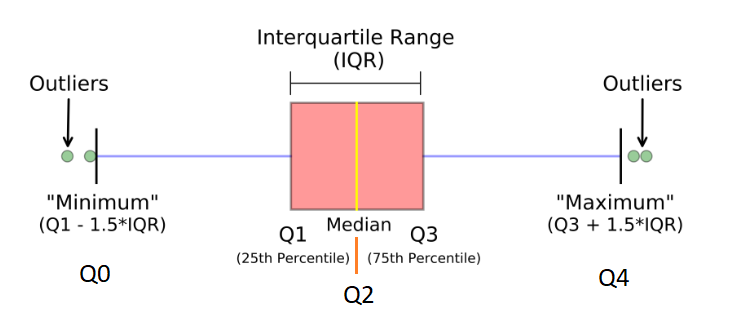

In [11]:
# Determining the number of rows containing outliers
def find_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    outliers = df[(df[col]<lower_limit) | (df[col]>upper_limit)]
    print("Number of outliers in",col,":", len(outliers))


for col in data1:
    if data1[col].dtypes in ["int64","float64"] and (data1[col].nunique()>2):
        find_outliers(data1,col)


Number of outliers in satisfaction_level : 0
Number of outliers in last_evaluation : 0
Number of outliers in number_project : 0
Number of outliers in average_monthly_hours : 0
Number of outliers in tenure : 824


- Only `tenure ` column contains 824 outliers 
- Certain types of models are more sensitive to outliers than others. Based on the type of model we need to decide weather to remove outliers or not.
- `For Logistic Regression we need to remove outliers`
- `Tree-based model which is less sensitive to the outliers, we are not going to remove the outliers.`

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


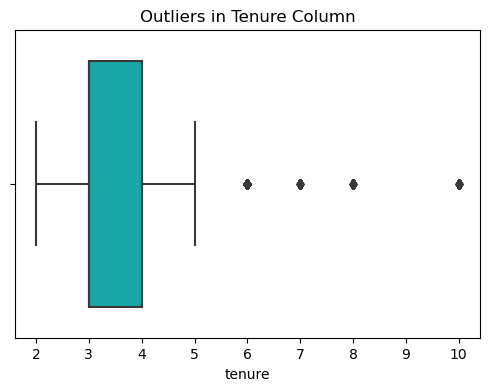

In [12]:
# Visualizing the outliers 
plt.figure(figsize=(6,4))
sns.boxplot(x=data1["tenure"],color="c")
plt.title("Outliers in Tenure Column")
plt.show()

## Step 3. Data Exploration (Continue EDA)

- More about data using data visualizations.


### About Target Variable ("Left")

left
0    10000
1     1991
Name: count, dtype: int64



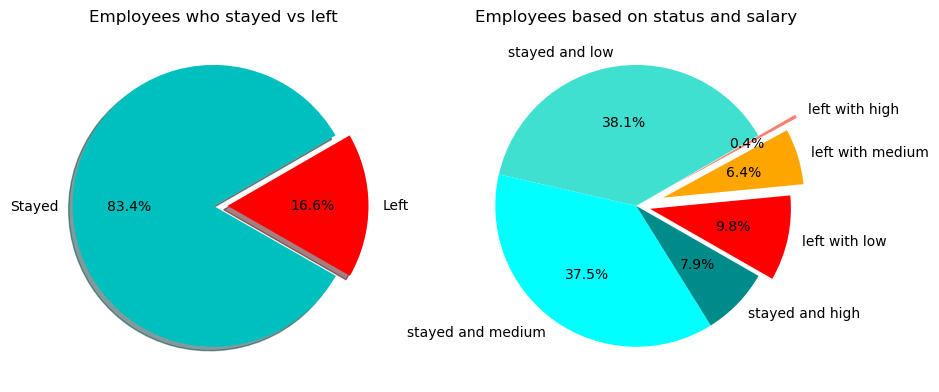

In [13]:
# Numbers of people who left vs. stayed
print(data1['left'].value_counts())
print()

fig,ax=plt.subplots(1,2,figsize=(10,5))
labels=["Stayed","Left"]
ax[0].pie(data1["left"].value_counts(),colors=["c","r"],autopct='%1.1f%%',labels=labels,shadow=True, startangle=30,explode=(0,0.1))
ax[0].set_title("Employees who stayed vs left")


label=["stayed and low","stayed and medium","stayed and high","left with low","left with medium","left with high"]
ax[1].pie(data1.groupby(data1["left"])["salary"].value_counts(),colors=["turquoise","cyan","darkcyan","red","orange","salmon"],
          autopct='%1.1f%%',startangle=30,explode=(0,0,0,0.1,0.2,0.3),labels=label)
ax[1].set_title("Employees based on status and salary")
plt.show()

In [114]:
seaborn

Object `seaboen` not found.


- 16% of employees left the company ,`around 10% of total 16% left with low salary`.
- Low salary to the employees might be a reason for employee turnover.

### Number of Projects vs Average Woking hours(weekly)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

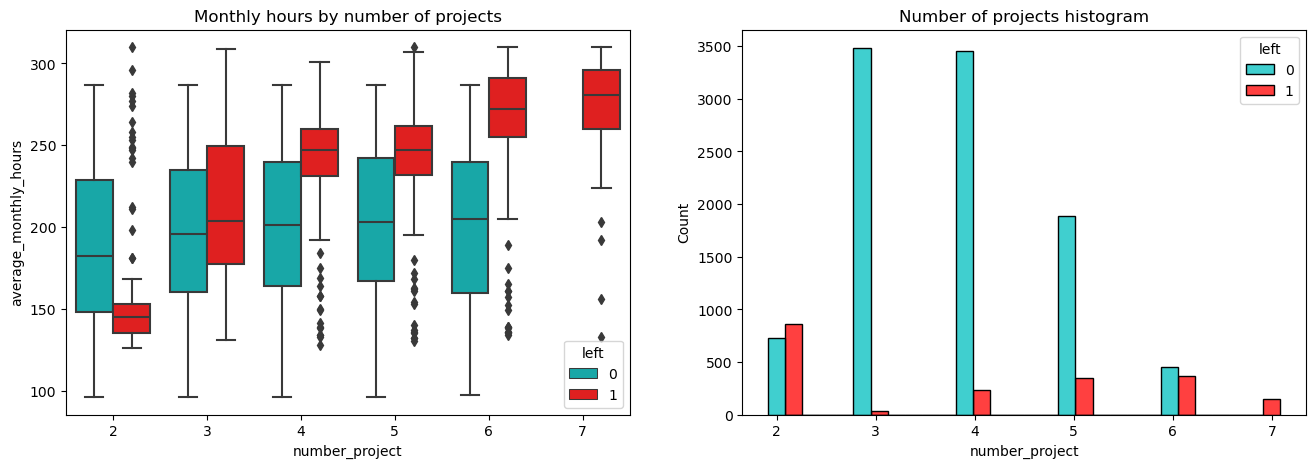

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

# Box plot showing 'average_monthly_hours' distribution for 'number_project', compairing people left and stayed.
sns.boxplot(data=data1, y='average_monthly_hours', x='number_project', hue='left', ax=ax[0],palette=["c","r"])
ax[0].set_title('Monthly hours by number of projects')

# Histogram  for 'number_project', compairing people left and stayed.
sns.histplot(data=data1, x='number_project', hue='left', multiple='dodge', ax=ax[1],palette=["c","r"],shrink=2)
ax[1].set_title('Number of projects histogram')

plt.show()

* From boxplot we have two groups of employees who left the company: 
1. (A) those who worked considerably less than their peers with the same number of projects
2. (B) those who worked much more. The employees in group B likely contributed a lot to the projects they worked in.


* From Histogram Plot
1. Everyone with seven projects left the company.
2. The optimal number of projects for employees to work on seems to be `3–4`. The ratio of left/stayed is very small for these cohorts.



Let us assume 9 hours work a day and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. `This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked`.

In [15]:
#Getting value counts of stayed/left for employees with 7 projects 
print("No of Employees with 7 projects left the company:",len(data1[data1['number_project'] == 7]['left']))

print("Total number of employees working more than 166.7 hrs a week:"
      ,len(data1[data1["average_monthly_hours"]>166.7]))

print("Total number of employees working more than 166.7 hrs a week and left the company:"
      ,len(data1[(data1["average_monthly_hours"]>166.7) & (data1["left"]==1)]))

No of Employees with 7 projects left the company: 145
Total number of employees working more than 166.7 hrs a week: 8278
Total number of employees working more than 166.7 hrs a week and left the company: 1107


### Visualizing Employees working hours (monthly)

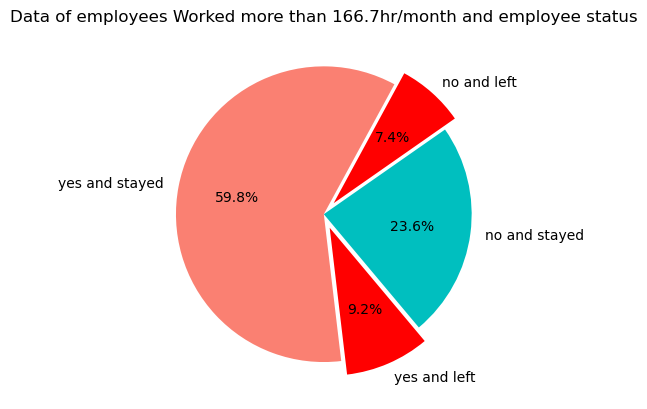

In [16]:
labels=["no and stayed","no and left","yes and stayed","yes and left"]
plt.pie(data1["left"].groupby(data1["average_monthly_hours"]>166.7).value_counts(),colors=["c","r","salmon","r"],
        labels=labels,startangle=310,explode=(0,0.1,0,0.1),autopct="%1.1f%%")
plt.title("Data of employees Worked more than 166.7hr/month and employee status")
plt.show()

`69% of employees are working extra hours weekly, This is very large percentage and the reasons should be known`

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

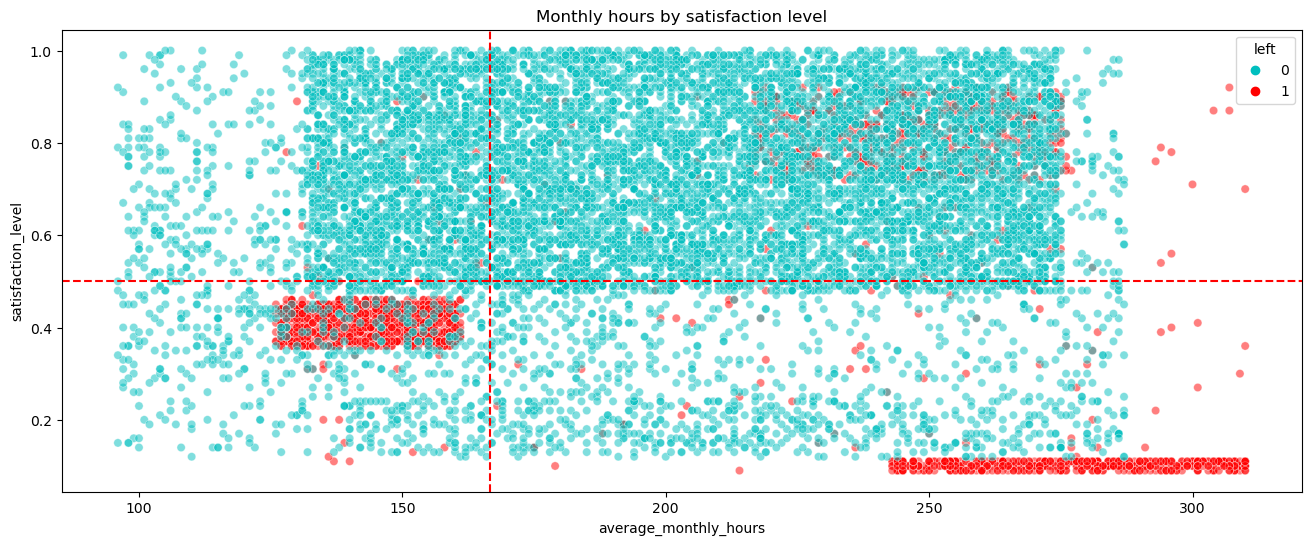

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

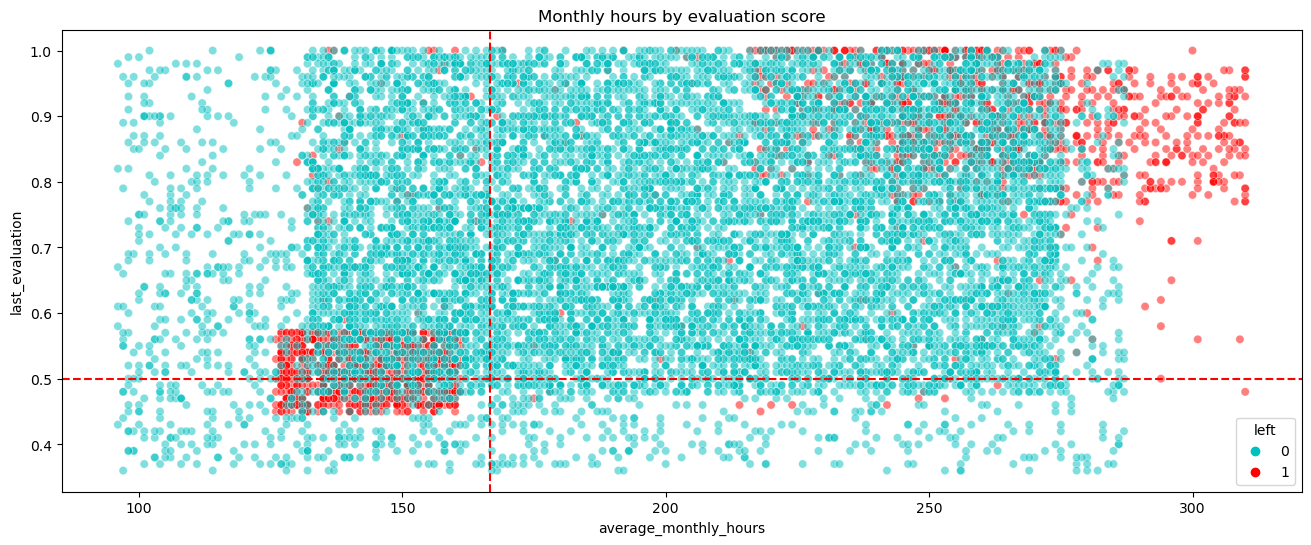

In [17]:
# scatterplot of monthly hours by satisfaction level
plt.figure(figsize=(16,6))
sns.scatterplot(data=data1,x="average_monthly_hours",y="satisfaction_level",hue="left",alpha=0.5,palette=["c","r"])
plt.title("Monthly hours by satisfaction level")
plt.axhline(y=0.5,color="r",ls="--")
plt.axvline(x=166.7,color="red",ls="--")
plt.show()


# scatterplot of monthly hours by evaluation score
plt.figure(figsize=(16,6))
sns.scatterplot(data=data1,x="average_monthly_hours",y="last_evaluation",hue="left",alpha=0.5,palette=["c","r"])
plt.title("Monthly hours by evaluation score")
plt.axvline(x=166.7,color="r",ls="--")
plt.axhline(y=0.5,color="r",ls="--")
plt.show()

* The scatterplot above shows 2 groups of employees
1. Group of employees who worked `~240–315 hours per month`. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.
2. Other group with nominal working hours and satisfaction levels around 0.4. It's difficult to speculate about why they might have left.


- There seems to be a correlation between hours worked and evaluation score,satisfaction level.
- Most of the employees in this company work well over 167 hours per month and have good satisfaction levels.


`Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.`

 ### Histograms to visualize the salary and tenure

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

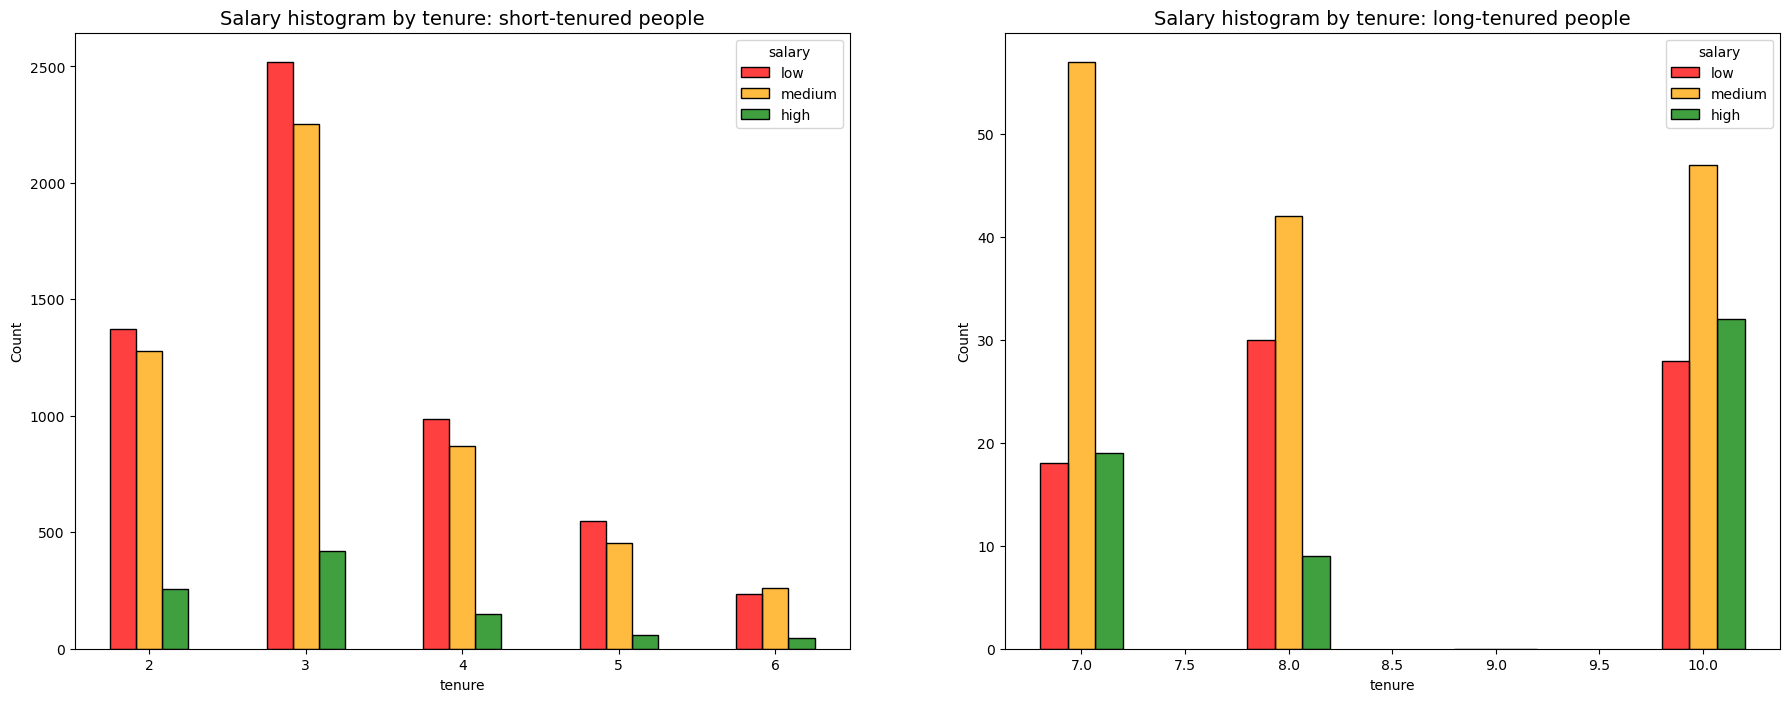

In [18]:
#Histogram for Salary levels for different tenures.

fig, ax = plt.subplots(1, 2, figsize=(22,8))
short_tenure = data1[data1['tenure'] < 7]
long_tenure = data1[data1['tenure'] > 6]

sns.histplot(data=short_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.5, discrete=1, ax=ax[0],palette=["r","orange","g"])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)

sns.histplot(data=long_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.4, discrete=1, ax=ax[1],palette=["r","orange","g"])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)

plt.show()

The Histograms above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

### Promotion of employees in last 5 years

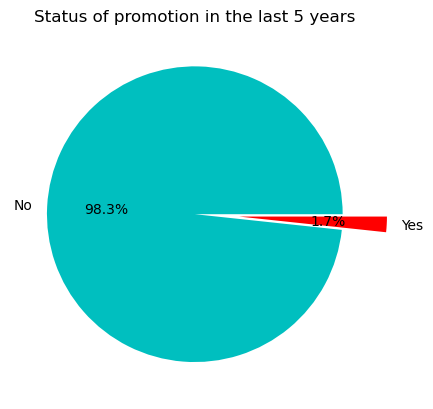

In [19]:
plt.pie(data1["promotion_last_5years"].value_counts(),colors=["c","r"],explode=(0,0.3),autopct="%1.1f%%",
       labels=["No","Yes"])
plt.title("Status of promotion in the last 5 years")
plt.show()

* Very few employees got promotion in the last 5 years

### Department wise employees distribution

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

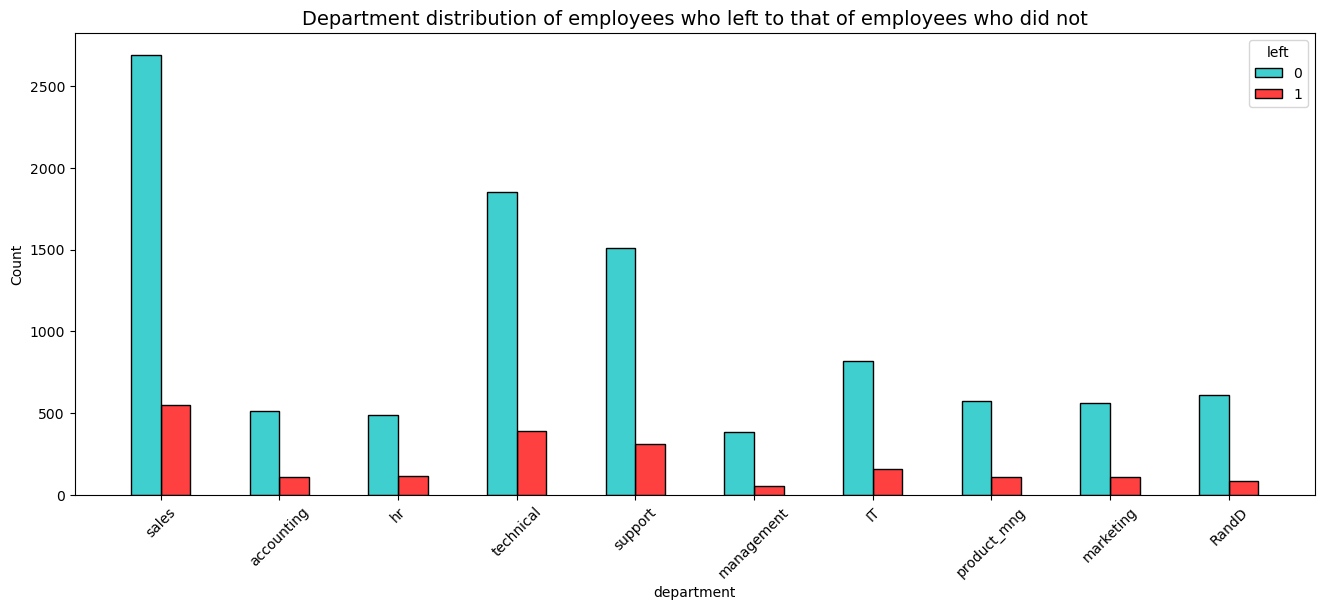

In [20]:
# Histogram to compare department distribution of employees who left to that of employees who didn't

plt.figure(figsize=(16,6))
sns.histplot(data=data1, x='department', hue='left', multiple='dodge', discrete=1, shrink=.5, hue_order=[0, 1],palette=["c","r"])
plt.title('Department distribution of employees who left to that of employees who did not', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Department of management has the lowest number of leaving, and the sales department has the highest number of leaving, compared to other departments in the dataset.

### Insights

On exploring the data, we have some more insights to share:
<br>
1. `Evidence suggests that employees are departing the company due to inadequate management.`
2. This Employee turnover seems to be associated with extended `working hours, a high project load, and overall lower satisfaction levels`. The experience of working long hours without receiving promotions or favorable evaluation scores can be disheartening.
3. Tenure has no relation with the salary
4. Employees with tenure between 3-5 years, when they need to work over time, they have high possibilities to leave. But after 6 years, they may get used to working over time or overflow.


## Step 4 : Model Constructions and evaluations
- Determining which models are most appropriate
- Constructing the models

The objective is to predict whether an employee will leave the company, which represents a categorical outcome variable. This task falls under classification. 
- As the outcome variable "left" can take two distinct values: 
1. 1--indicating the employee left
2. 0--indicating the employee did not leave.

**Since the variable is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.**

## Model 1: Logistic Regression

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- `No extreme outliers`
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size




In [21]:
data2 = data1.copy()
data2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Before splitting the data, we need to encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means we can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

### Encoding the data

In [22]:
# Encoding the `salary` column as an ordinal numeric category

data2["salary"] = data2["salary"].astype("category").cat.set_categories(["low","medium","high"]).cat.codes

# Dummy encoding the `department` column

data2 = pd.get_dummies(data2,drop_first=False,dtype=int)

data2.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_IT           11991 non-null  int32  
 10  department_RandD        11991 non-null  int32  
 11  department_accounting   11991 non-null  int32  
 12  department_hr           11991 non-null  int32  
 13  department_management   11991 non-null  int32  
 14  department_marketing    11991 non-null  int

### Removing Outliers

In [24]:
# Removing outliers from 'tenure' and saving it in new variable
Q1=data["tenure"].quantile(0.25)
Q3=data["tenure"].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

data_log = data2[(data2["tenure"]>=lower_limit) & (data2["tenure"]<=upper_limit)]
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary                  11167 non-null  int8   
 9   department_IT           11167 non-null  int32  
 10  department_RandD        11167 non-null  int32  
 11  department_accounting   11167 non-null  int32  
 12  department_hr           11167 non-null  int32  
 13  department_management   11167 non-null  int32  
 14  department_marketing    11167 non-null  int

### LogisticRegression model construction

In [25]:
# Isolating target variable
Y = data_log["left"]

# Selecting the required features
X = data_log.drop("left",axis=1)

# Split the data into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

# Constructing logistic regression model
Log_reg = LogisticRegression(random_state=42,max_iter=500)

# Fit the model
Log_reg.fit(X_train,Y_train)

# Predictions of X_test
Y_pred = Log_reg.predict(X_test)


### Model evaluation

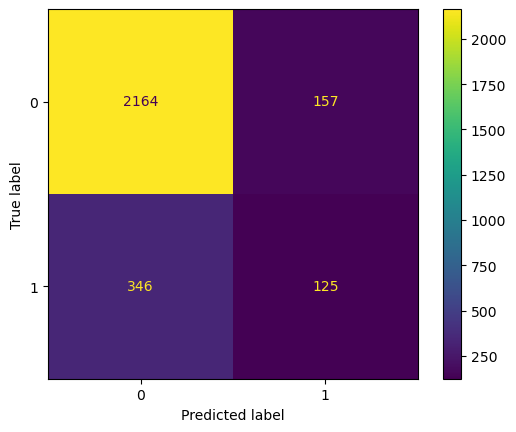

In [26]:
# Confusion matrix to visualize results
log_cm = confusion_matrix(Y_test,Y_pred,labels=Log_reg.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm)
log_disp.plot()
plt.show()

- The upper-left quadrant displays the number of true negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-left quadrant displays the number of false negatives.
- The bottom-right quadrant displays the number of true positives.

`True negatives`: The number of people who did not leave that the model accurately predicted did not leave.

`False positives`: The number of people who did not leave the model inaccurately predicted as leaving.

`False negatives`: The number of people who left that the model inaccurately predicted did not leave

`True positives`: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

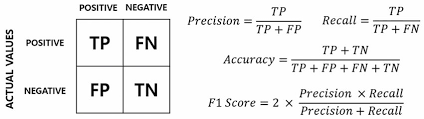

In [27]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(Y_test,Y_pred,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. `However, if it's most important to predict employees who leave, then the scores are significantly lower`.

## Model 2: Decision Tree 

**Decision tree model assumptions**
- Since the Decision Tree is Non-statistical approach it makes `no assumptions` of the training data or prediction residuals; e.g., no distributional, independence, or constant variance assumptions.



### Decision Tree model construction

In [28]:
%%time
# decision tree model
dec_tree = DecisionTreeClassifier(random_state=42)

# Creating dictionary of hyperparameter to search over
cv_params = {'max_depth' : [4, 6, 8, None],
             'min_samples_leaf' : [2, 5, 1],
             'min_samples_split' : [2, 4, 6]
            }

# Scoring metrics
scoring = ('accuracy', 'precision','recall','f1','roc_auc')

# Instantiating GridSearch
tree1 = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# fit the model
tree1.fit(X_train, Y_train)

CPU times: total: 3.42 s
Wall time: 3.43 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [29]:
print(tree1.best_score_)
print(tree1.best_params_)

0.9738070859906354
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


### Decision tree evaluation

In [30]:
def make_results(model_name:str, model_object, metric:str):
 
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [31]:
tree1_cv_results = make_results('Decision tree 1', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision tree 1,0.959115,0.912839,0.935275,0.978747,0.973807


## Model 3: Random Forest 

**Random Forest over Decision Tree**

Choose random forest over decision tree when 
1. accuracy matters most.
2. dealing with complex data.
3. interpretability isn't crucial.
4. handling large datasets. 
5. missing values are present.

### Random Forest model construction

In [32]:
# Random forest model
rf= RandomForestClassifier(random_state=42)

# Dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Scoring metrics to capture
scoring = ('accuracy','precision','recall','f1','roc_auc')

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [33]:
%%time
rf1.fit(X_train, Y_train)

CPU times: total: 20min 23s
Wall time: 20min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [34]:
print(rf1.best_score_)
print(rf1.best_params_)

0.9810006094817421
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


### Model evaluation scores

In [111]:
rf1_cv_results = make_results('Random forest 1', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Decision tree 1   0.959115  0.912839  0.935275  0.978747  0.973807
             model  precision    recall       F1  accuracy       auc
0  Random forest 1   0.968971  0.908588  0.93769  0.979702  0.981001


- The evaluation scores of the random forest model are better than those of the decision tree model.
- **This indicates that the random forest model mostly outperforms the decision tree model.**

##  Evaluation scores on test data of both models

In [42]:
# Function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
  
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [51]:
# Getting test data scores
tree1_test_scores = get_scores("Decision Tree1 test",tree1,X_test,Y_test)
print(tree1_test_scores)
print()
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, Y_test)
print(rf1_test_scores)

                 model  precision    recall        f1  accuracy       AUC
0  Decision Tree1 test   0.962637  0.929936  0.946004  0.982092  0.961306

                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.982063  0.929936  0.955289  0.985315  0.963245


- The test scores are very similar to the validation scores, which is good. This appears to be a strong model.
- **Random Forest model is high in all the scores when compared to decision tree and logistic regression.**

### Confusion matrix for models

In [112]:
# Function to plot confusion matrics
def confusionmatrix(model):
    # Generating array of values for confusion matrix
    preds = model.best_estimator_.predict(X_test)
    cm = confusion_matrix(Y_test, preds, labels=model.classes_)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='')
    plt.title(model.estimator)
    plt.show()

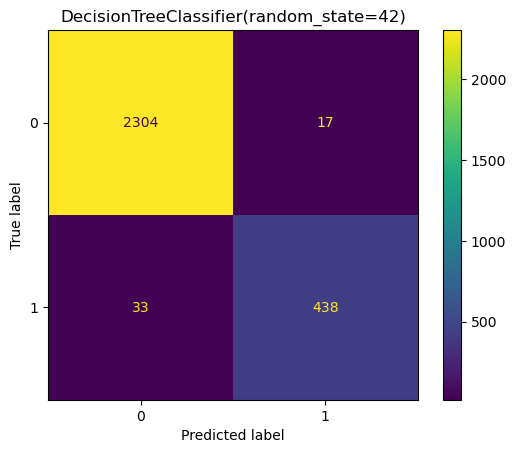

In [81]:
confusionmatrix(tree1)

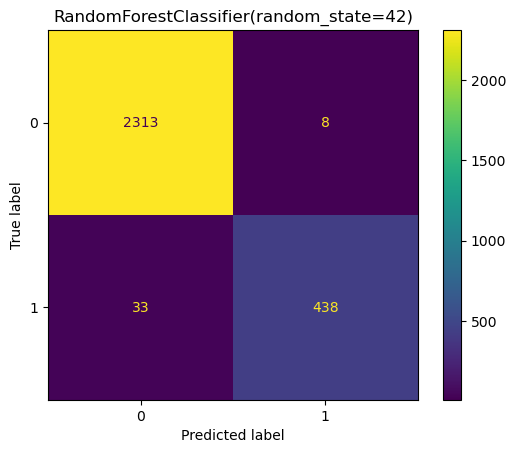

In [82]:
confusionmatrix(rf1)

- The Decision tree model predicts more false positives , which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case.

- The Random Forest model predicts less false positives when compared with both logistic regression and decision tree

### Feature Importances

-  
Feature importancs, refers to a set of techniques used to rank the input features of a model based on their relative contribution to the output. I  simpler terms, it helps you understand which features are the most important in influencing the model's predictions.

In [87]:
# Decision tree
dec_tree_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dec_tree_importances = dec_tree_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dec_tree_importances = dec_tree_importances[dec_tree_importances['gini_importance'] != 0]
dec_tree_importances

,gini_importance
satisfaction_level,0.553990
tenure,0.167601
last_evaluation,0.138160
number_project,0.114046
average_monthly_hours,0.026202


In [100]:
rf_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf_importances = rf_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf_importances = rf_importances[rf_importances['gini_importance'] != 0]
rf_importances

,gini_importance
satisfaction_level,0.525768
tenure,0.163802
number_project,0.135555
last_evaluation,0.127413
average_monthly_hours,0.046026
department_technical,0.000407
salary,0.000381
department_marketing,0.000165
department_accounting,0.000146
department_IT,0.000140


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

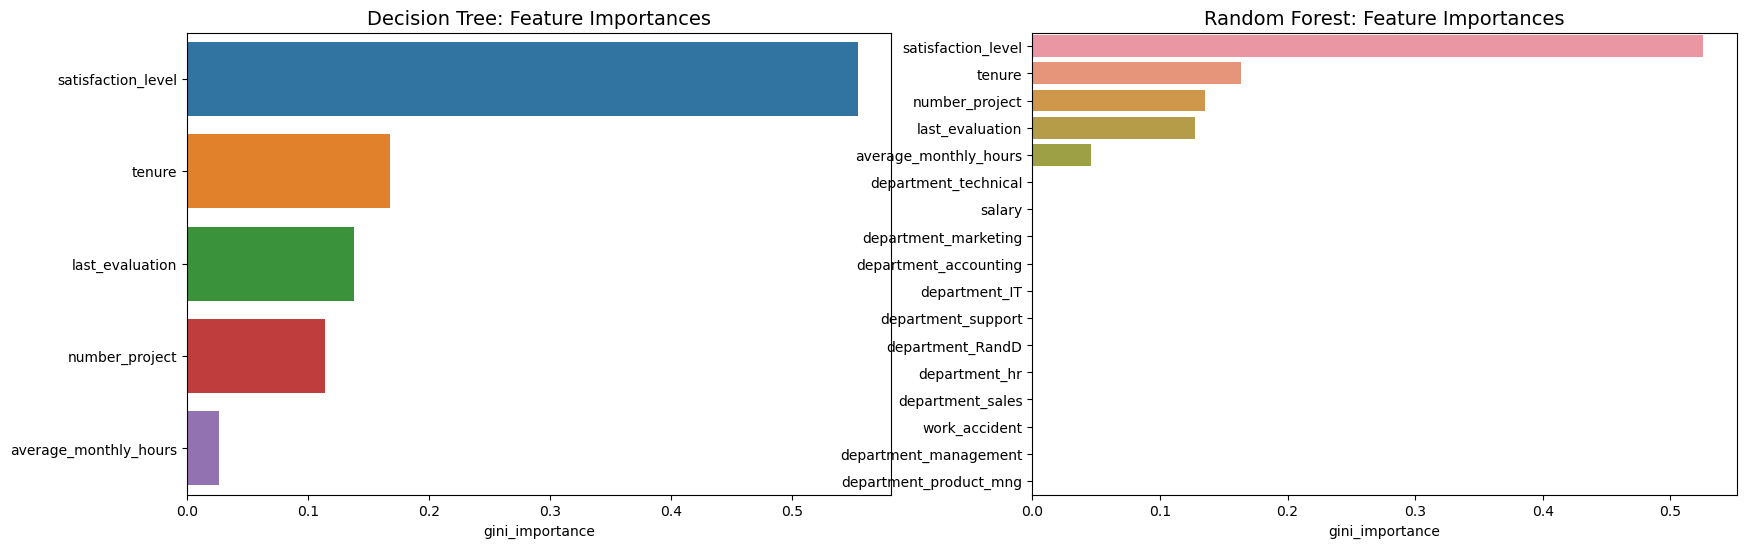

In [109]:


# Barplot to visualize the decision tree feature importances.
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.barplot(data=dec_tree_importances, x="gini_importance", y=dec_tree_importances.index,ax=ax[0])
ax[0].set_title("Decision Tree: Feature Importances", fontsize=14)

sns.barplot(data=rf_importances, x="gini_importance", y=rf_importances.index, orient='h',ax=ax[1])
plt.title("Random Forest: Feature Importances", fontsize=14)
plt.show()

- `satisfaction_level, number_project, tenure, and working hours have the highest importance.`
- `These variables are most helpful in predicting the outcome variable, left.`

### Conclusion and Recommendations

1. Built a Random Forest model to predict whether or not an employee will leave the company, the f1 score is as high as 0.93 and AUC is around 0.98, which are the good of a prediction model.
1. The company should reduce the chance of working over time and overflow. Also, setup a policy that can give the project fairly.
1. Invest in the group who have lower salaries in order to increase their satisfaction level.
1. Increase the chance of promotion.
1. Next Steps:
    1. We should get more data of employees who left the company
    1. We can work on analysing the trends of satisfaction_level.
